<a href="https://colab.research.google.com/github/soumabkargit/intro-to-machine-learning/blob/master/CalculatingGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

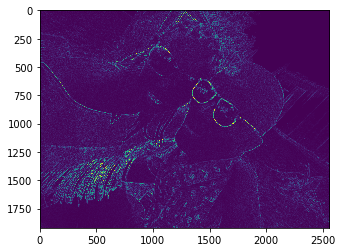

In [19]:
#Import libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download du fichier
id = '1T0LqOHztZ1wpVl8O4u-qxcQ_kiwDehbb'
downloaded = drive.CreateFile({'id': '1T0LqOHztZ1wpVl8O4u-qxcQ_kiwDehbb'})
downloaded.GetContentFile('test_2.jpg')

#Read images for different blurring purposes
src = cv2.imread("test_2.jpg")
#Apply gaussian blur
cv2.GaussianBlur(src, (3, 3), 0)
#Convert image to grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#Apply Sobel method to the grayscale image
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1,delta=0, borderType=cv2.BORDER_DEFAULT)
#Horizontal Sobel Derivation
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1,delta=0, borderType=cv2.BORDER_DEFAULT) 
#Vertical Sobel Derivation
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#Apply both
#Show the image
plt.imshow(grad)#View the image
